## Estructurando un proyecto de DS - Parte II

# Introducción (Parte I): 
El presente trabajo tiene como objetivo elaborar un modelo predictivo utilizando las herramientas de data science. Para ello seleccioné el dataset referido a la deserción bancaria, es decir, a la pérdida o desgaste de clientes bancarios. Dicho prámetri está representado por la variable "Attrition_flag" y el término “Attition” se refiere al fenómeno en el que los clientes dejan de hacer negocios con un banco o se cambian a otro banco. Esta información es una métrica fundamental para los bancos, ya que afecta directamente a su base de clientes y a sus ingresos. Es por eso que resulta de mucha utilidad entender las principales variables que permitan anticipar la deserción bancaria. El presente trabajo tiene el objetivo de desarrollar un modelo de predicción para anticipar el porcentaje de clientes que abandanan el servicio (variable target).

El dataset elegido cuenta con 23 columnas con datos de: cliente, edad, estado del cliente (existente o “desgastado”), genero, nivel de educación, estado civil, categoría de ingresos, categoría de tarjeta de crédito, antigüedad, meses de inactividad, límite de crédito, límite disponible, total de transacciones, entre otras.

Antes de comenzar a trabajar el dataset podemos suponer que las categorías antes mencionadas pueden tener dependencia entre sí. Es decir, podríamos indagar si existe relación entre la edad de los clientes y su decisión de abandonar el servicio. 
Antes de comenzar proponemos plantear los siguientes interrogantes para entender la relación entre nuestras variables. En función de los datos obtenidos podremos elaborar nuestro modelo predictivo. La interacción o dependencia de los features nos permitirá entrenar a nuestro modelo predictivo.

# Preguntas e hipótesis (Parte II)
Siendo una base con información de clientes bancarios y el detalle de los clientes que abandonan el servicio queremos armar un modelo que permita precedir las variables que determinan que un cliente abandone el servicio. Para ello analizaremos:
¿En qué porcentaje los clientes abandonan el servicio?
¿Hay relación entre la edad de los clientes y el abandono del servicio?
¿Cómo se distribuye (%) los clientes que abandonan el servicio según el rango de sus ingresos informados?
¿Existe correlación entre mi variable target (abandono de clientes) y el resto de las variables del presente dataset?
¿Hay diferencias significativas en la distribución del límite crediticio entre los clientes y los que abandonan?
¿Los clientes de mayor edad están abandonando más que los más jóvenes?

A continuación realizaremos visualizaciones y tansformaciones de nuestras variables para avanzar en la elaboración de nuestro modelo de DS.

# Objetivo (Parte II): 
Nuestro objetivo es construir un modelo de predicción para clasificar si un cliente abandonará el servicio y la probabilidad de que un cliente abandone nuestro servicio bancario. 
 

# Contexto comercial (Parte II)
Soy el responsable del área de Servicio al cliente de un importante banco comercial y este año me solictaron desarrollar estratégias de retención de clientes para reducir en un 5% la cantidad de clientes que abandonan el banco dentro de los próximos 12 meses. Mi banco se desarrolla dentro de un sistema con alta competencia y bajas barreras de salida para nuestros clientes. 


# Problema comercial  (Parte II)
Sabemos que nuestros clientes reciben, al menos, 4 propuestas al año para cambiarse de banco por distintos beneficios. Sumado a la alta competencia, contamos con estadísticas que nos muestran que el 20% de nuestros clientes presenta al menos un reclamo durante su tiempo cómo cliente. Conocemos los principales motivos de queja y le damos seguimiento, sin embargo, no pudimos establecer el patrón entre los motivos de reclamo, la frecuencia y la deserción. Por lo tanto precisamos desarrollar un modelo que nos permita predecir el porcentaje de deserción. 


# Contexto analítico (Parte II)
Para poder desarrollar el modelo se cuenta con la siguiente información:
Base de datos con total de clientes de nuestro banco con el detalle de cada uno según: Edad, Sexo, Nivel educativo, estado civil, categoria de ingresos, categoria de tarjetade credito, antiguedad, años sin movimientos,límite de crédito, límite de reintegros, límite disponible, promedio de límite utilizado, entre otros.
Features: Nuestra base tiene 10.127 registros y 23 variables. No tenemos valores vacíos pero tenemos 14%, 7% y 11% de valores 'desconocidos' en las variables "nivel educativo", "estado civil" y "categoria de ingresos" respectivamente. Considerando que los porcentajes son bajos y que los mismos se presentan en variables categoricas que el cliente no quiso brindar vamos a tratar el valor desconocido como una categoria más. Posiblemente este problema se mantenga en futuros clientes y asumir un valor para dichos valores puede afectar al modelo. Es por eso que preferimos no completar con inferencias.

Variable Target: Binaria. Nuestra variable target será el parámetro de clientes que abandonan el servicio que en la base está representado por la columna "Attrition_flag".Indica un 1 si el cliente mantiene el servicio y 0 si decide abandonar el servicio.

A continuación exploraremos los datos con las herramientas de la librería pandas.crosstab para obtener gráficos que relacionen nuestra variable target con el resto de las características. Luego analizaremos la dependencia entre la variable target y el resto de las variables. Dado que nuestra base tiene la mayoría de sus variables categoricas las transformaremos en variables en numéricas para poder establecer la correlación entre las variables y obtener conclusiones. Finalmente elaboraremos nuevas variables que nos permita alimentar nuestro modelo predictivo con mayor precisión.


# EDA  (Parte II)
A continuación se desarrolla distintos análisis exploratorio de los datos. 

In [206]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Libreria para estimar regresión
import statsmodels.formula.api as sm

# Libreria para PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [207]:
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1q-d4ynkoY0ryNcDBd7ABuO3kc1wSaRzU'
# Nombre del archivo local donde se descargará el CSV
Dataset_bankChurners = 'BankChurners.csv'

# Descarga del archivo CSV desde Google Drive
gdown.download(url, Dataset_bankChurners, quiet=False)

# Carga del archivo CSV en un DataFrame de pandas
df = pd.read_csv(Dataset_bankChurners)

# Muestra las primeras filas del DataFrame para verificar
print(df.head(2))

Downloading...
From: https://drive.google.com/uc?id=1q-d4ynkoY0ryNcDBd7ABuO3kc1wSaRzU
To: C:\Users\HP\Downloads\BankChurners.csv
100%|█████████████████████████████████████████████████████████████████████████████| 1.51M/1.51M [00:00<00:00, 2.40MB/s]


   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   

   Naive_Bayes_Cl

In [208]:
df= df.iloc[:, 1:-2]

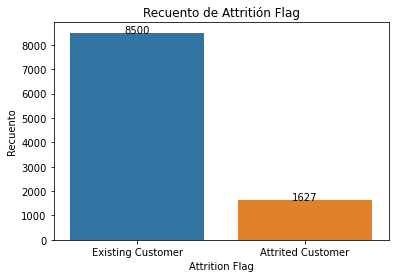

In [209]:
# Grafico univariado de total de clientes según si abandonaron el servicio"

plt.figure()
ax = sns.countplot(data=df, x='Attrition_Flag')

# Agregar etiquetas y título
plt.xlabel('Attrition Flag')
plt.ylabel('Recuento')
plt.title('Recuento de Attritión Flag')

# Agregar etiquetas con los valores de cada columna
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline')

# Mostrar el gráfico
plt.show()

Interpretación: Analizando la variable target (Attrition_Flag) en el gráfico univariado podemos inferir que la probabilidad de que un cliente nuevo abandone el servicio estará en el orden del 16% (1.627/10.127). Dado que este % es pequeño podemos inferir que el modelo elegido debería precedir una deserción cercana a este número. Nuestro interés como banco es que dicho porcentaje no aumente y desarrollar estrategias para que ese porcentaje, luego de aplicar nuestras estratégias, se reduzca al menos en 5 puntos.

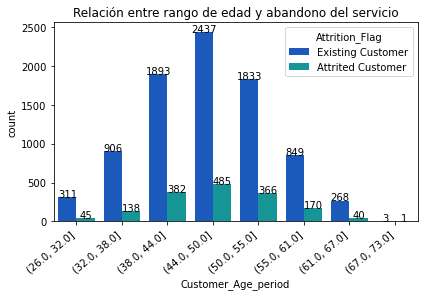

In [210]:
# Grafico bivariado de "Rango de edad y abandono del servicio"

df['Customer_Age_period'] = pd.cut(np.array(df['Customer_Age']), 
                                              bins=int(df.Customer_Age.std()),
                                              precision=0)

ax = sns.countplot(x="Customer_Age_period", hue='Attrition_Flag', data=df, palette="winter")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()


# Agregar etiquetas de valores en el gráfico
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline')

plt.title('Relación entre rango de edad y abandono del servicio')
plt.show()

Interpretación: vemos una relación entre el rango etario y el abando del servicio. Se mantiene cierta proporcionalidad para cada rango etário. Con la presente información podemos alimentar nuestro modelo predictivo incluyendo los porcentajes en los cuáles los clientes abandonan el servicio para cada rango etáreo.

In [211]:
# Ahora analizamos la probabilidad de que un cliente abandone el servicio según su género

cross = pd.crosstab(df['Gender'], 
            df['Attrition_Flag'], 
            margins = True, 
            margins_name = "% row", 
            normalize='index')
display(cross)

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,0.173572,0.826428
M,0.146152,0.853848
% row,0.160660,0.839340


Interpretación: A partir del presente cuadro podemos asumir que si el banco adquiere un nueve cliente masculino las probabilidades que abandone seran de 14% mientras que si es femenino las probabilidades ascienden a 17%. Este análisis permitirá especificar a nuestro modelo una probabilidad condicional respecto al genero y nuestra variable target.

In [212]:
# ahora vamos a analizar si la edad está correlacionado con el hecho de que un cliente abandone el servicio. 
# Para ello vamos a agrupar las edades en rangos según su distribución estándar.
df['Customer_Age_period'] = pd.cut(np.array(df['Customer_Age']), 
                                              bins=int(df.Customer_Age.std()),
                                              precision=0)

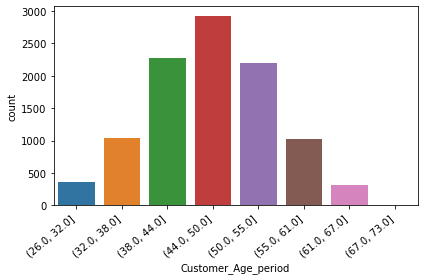

In [213]:
ax = sns.countplot(x="Customer_Age_period", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [214]:
# Ahora analizamos la probabilidad de que un cliente abandone el servicio según su género

cross = pd.crosstab(df['Customer_Age_period'], 
            df['Attrition_Flag'], 
            margins = True, 
            margins_name = "% row", 
            normalize='index')
display(cross)

Attrition_Flag,Attrited Customer,Existing Customer
Customer_Age_period,,
"(26.0, 32.0]",0.126404,0.873596
"(32.0, 38.0]",0.132184,0.867816
"(38.0, 44.0]",0.167912,0.832088
"(44.0, 50.0]",0.165982,0.834018
"(50.0, 55.0]",0.166439,0.833561
"(55.0, 61.0]",0.166830,0.833170
"(61.0, 67.0]",0.129870,0.870130
"(67.0, 73.0]",0.250000,0.750000
% row,0.160660,0.839340


In [215]:
# list of features name that are int64, object, and float64
s = (df.dtypes == 'int64')
int64_cols = list(s[s].index)
print(f"{len(int64_cols)} int64 features:\n{int64_cols}")

s = (df.dtypes == 'category')
cat_cols = list(s[s].index)
print(f"\n{len(cat_cols)} Categorical features:\n{cat_cols}")

s = (df.dtypes == 'float64')
float64_cols = list(s[s].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")
del s

9 int64 features:
['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']

1 Categorical features:
['Customer_Age_period']

5 float64 features:
['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [216]:
cat_df = df[cat_cols].apply(lambda x : pd.factorize(x)[0])
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer_Age_period  10127 non-null  int64
dtypes: int64(1)
memory usage: 79.2 KB


In [202]:
# Supongamos que tienes un DataFrame llamado df con las columnas "Variable" y "Target"
# Primero, agrupa los datos y calcula las tasas de eventos y no eventos
df['Variable_Bins'] = pd.cut(df['Customer_Age'], bins=5)  # Divide en 5 bins (ajusta según tus necesidades)
grouped = df.groupby('Variable_Bins')
event_rate = grouped['Attrition_Flag'].mean()
non_event_rate = 1 - event_rate

# Calcula el WOE
WOE = np.log(event_rate / non_event_rate)

# Calcula el IV
IV = np.sum((WOE * (event_rate - non_event_rate)))

print("Information Value (IV) =", IV)


KeyError: 'Column not found: Attrition_Flag'

El valor de IV de 6.339551493935651 es relativamente alto, lo que sugiere que la variable de Edad es muy informativa y desempeña un papel importante en la predicción del resultado. Esto es una señal positiva, ya que una variable con alto IV es valiosa para la construcción de modelos predictivos.

In [217]:
df['Card_Category'] = label_encoder.fit_transform(df['Card_Category'])

In [94]:

# Primero, agrupa los datos y calcula las tasas de eventos y no eventos
df['Variable_Bins'] = pd.cut(df['Card_Category'], bins=5)  # Divide en 5 bins (ajusta según tus necesidades)
grouped = df.groupby('Variable_Bins')
event_rate = grouped['Attrition_Flag'].mean()
non_event_rate = 1 - event_rate

# Calcula el WOE
WOE = np.log(event_rate / non_event_rate)

# Calcula el IV
IV = np.sum((WOE * (event_rate - non_event_rate)))

print("Information Value (IV) =", IV)

Information Value (IV) = 3.8661466265649267


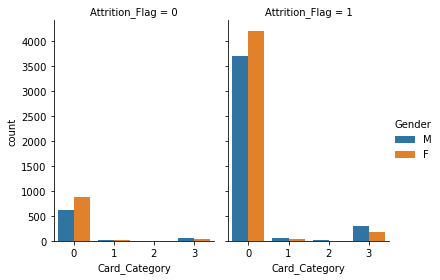

In [95]:
sns.catplot(x="Card_Category", hue="Gender", col="Attrition_Flag",
                data=df, kind="count",
                height=4, aspect=.7);

Interpretación: similar al cuadro anterior en el presente gráfico vemos que los clientes que abandonan el servicio (Attrition_flag=0) mantienen una relación según el tipo de tarjeta similar a los clientes que mantienen el servicio. Para definir nuestro modelo podríamos obtener los % de cada combinación.

In [194]:
# A continuación realizaremos gráfico multivariado. Antes de realizar un cuadro de correlación elimino las columnas que no aportan valor a la visualización
df = df.iloc[:, 1:-3]
#elimino las columnas que no aportan valor a mi siguiente cuadro de correlación

<AxesSubplot:>

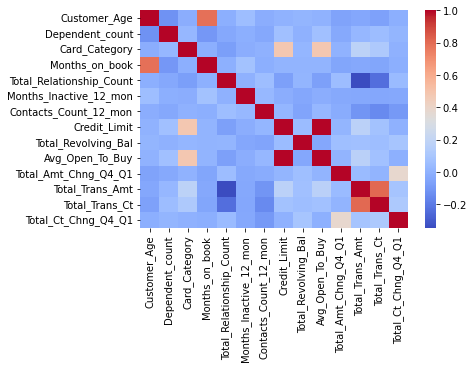

In [195]:
# Matriz de correlación de todos las variables

corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm")

Interpretación: realizamos este gráfico de correlación para evidenciar las dependencias de las variables de nuestro dataset. Vemos que Credit limit está correlacionado con Average open to Buy y Month on book está correlacionado con Customer Age. Ese gráfico nos da elementos para entrenar a nuestro futuro modelo de DS. Sin embargo nuestra variable target (Attrition_Flag) no muestra -con este método - dependencia fuerte con otras variables.

In [196]:
import pandas as pd
from scipy.stats import chi2_contingency

# A continuación podemos ver la correlación entre Attrition flag y la cantidad de años de falta de actividad
# Selecciono las columnas de interés
data = df[['Attrition_Flag', 'Months_Inactive_12_mon']]

# Realiza una tabla de contingencia entre las dos columnas
tabla_contingencia = pd.crosstab(data['Attrition_Flag'], data['Months_Inactive_12_mon'])

# Realiza la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Imprime el resultado
print(f"Valor de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")
print("Valores esperados:")
print(expected)

KeyError: "['Attrition_Flag'] not in index"

Interpretación: Dado que el valor de chi-cuadrado es de 396.45619934093764 y es bastante grande, lo que sugiere que hay una relación significativa entre las variable de meses de inactividad y el parametro que indica que el cliente abandona el servicio.

Valor p: 1.6155198022595323e-82 : El valor p es extremadamente pequeño (cercano a cero). Esto indica que la probabilidad de que la asociación observada entre las dos variables sea el resultado del azar es casi nula. En otras palabras, hay evidencia sólida para rechazar la hipótesis nula de independencia y concluir que hay una asociación significativa entre el abandono de clientes y los meses de inactividad.

# Parte III

In [197]:
# list of features name that are int64, object, and float64
s = (df.dtypes == 'int64')
int64_cols = list(s[s].index)
print(f"{len(int64_cols)} int64 features:\n{int64_cols}")

s = (df.dtypes == 'category')
cat_cols = list(s[s].index)
print(f"\n{len(cat_cols)} Categorical features:\n{cat_cols}")

s = (df.dtypes == 'float64')
float64_cols = list(s[s].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")
del s

9 int64 features:
['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']

0 Categorical features:
[]

4 float64 features:
['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']


In [110]:
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,45,M,3,High School,Married,$60K - $80K,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625
1,49,F,5,Graduate,Single,Less than $40K,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714
2,51,M,3,Graduate,Married,$80K - $120K,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333
3,40,F,4,High School,Unknown,Less than $40K,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333
4,40,M,3,Uneducated,Married,$60K - $80K,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500


In [146]:
df = df.iloc[:, 1:-3]

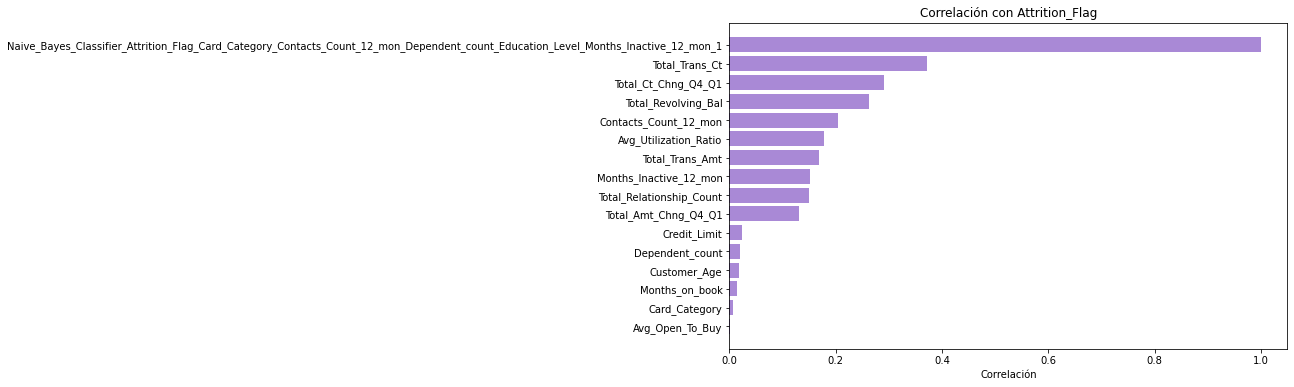

In [149]:
# Grafico el top 20 de variables más correlacionadas


matriz_correlacion_target_graficar = matriz_correlacion_target[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con Attrition_Flag')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

In [182]:
# Primer paso: definir el nombre de la función y sus parámetros
def calculadora_IV(lista_variables,target):
    """
    Esta función calcula el IV de una lista de variables categóricas vs un flag binario.

    Args:
        lista_variables: Lista que incluya el nombre de cada variable a la que se le quiere calcular el IV.
        target: Nombre de la columna que contiene a la variable target.

    Returns:
        Dataframe con dos columnas: Variable (nombre de la variable) e IV (Information Value).
    """
    
    # Calculo la cantidad de variables que se van a recorrer
    cantidad_variables = len(lista_variables)
    
    # Genero el dataframe que se entregará al final, vacío
    IV_df = pd.DataFrame(columns=['Variable', 'IV'])        
    
    # Genero un loop que recorre cada elemento de la lista de nombres de variables que se quiere generar el cálculo
    for i in range(cantidad_variables):
    
        # Calculo tablita agrupada por cada variable
        tabla_IV = df.groupby(lista_variables[i]).agg(      
            Cant = (target, 'count'),
            Cant_Exito = (target, 'sum'),    
            Tasa_Exito = (target, 'mean')
        ).reset_index()
        
        # Agrego la "Tasa de No Exito"
        tabla_IV['Tasa_No_Exito'] = 1 - tabla_IV['Tasa_Exito']
        
        # Agrego la "Cantidad de casos de No Exito"
        tabla_IV['Cant_No_Exito'] = tabla_IV['Cant'] - tabla_IV['Cant_Exito']
        
        # Hago cálculos necesarios para llegar al IV
        tabla_IV['LN'] = np.log(tabla_IV['Tasa_Exito'] / tabla_IV['Tasa_No_Exito'])
        tabla_IV['Pct_Exitos'] = tabla_IV['Cant_Exito'] / sum(tabla_IV['Cant_Exito'])
        tabla_IV['Pct_NoExitos'] = tabla_IV['Cant_No_Exito'] / sum(tabla_IV['Cant_No_Exito'])
        tabla_IV['Resta'] = tabla_IV['Pct_Exitos'] - tabla_IV['Pct_NoExitos']
        tabla_IV['IV'] = tabla_IV['Resta'] * tabla_IV['LN'] 
        
        # Agrego el IV como un registro más en la tabla que generé
        nuevo_dato = {'Variable': lista_variables[i], 'IV': sum(tabla_IV['IV'])}
        IV_df = IV_df.append(nuevo_dato, ignore_index=True)

    return IV_df

In [151]:
help(calculadora_IV)

Help on function calculadora_IV in module __main__:

calculadora_IV(lista_variables, target)
    Esta función calcula el IV de una lista de variables categóricas vs un flag binario.
    
    Args:
        lista_variables: Lista que incluya el nombre de cada variable a la que se le quiere calcular el IV.
        target: Nombre de la columna que contiene a la variable target.
    
    Returns:
        Dataframe con dos columnas: Variable (nombre de la variable) e IV (Information Value).



In [90]:
# Vamos a probarla: 
variables_calcular = ['Customer_Age','Gender','Education_Level','Marital_Status','Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio'
]

tabla_iv = calculadora_IV(variables_calcular,'Attrition_Flag')
tabla_iv.sort_values(by = 'IV', ascending = False)

C:\Users\HP\AppData\Local\Temp\ipykernel_15968\362610380.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  IV_df = IV_df.append(nuevo_dato, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15968\362610380.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  IV_df = IV_df.append(nuevo_dato, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15968\362610380.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  IV_df = IV_df.append(nuevo_dato, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15968\362610380.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  IV_df = IV_df.append(nuevo_dato, ignore_index=Tr

,Variable,IV
0,Customer_Age,inf
6,Contacts_Count_12_mon,inf
7,Credit_Limit,inf
8,Total_Revolving_Bal,inf
9,Avg_Open_To_Buy,inf
10,Total_Amt_Chng_Q4_Q1,inf
11,Total_Trans_Amt,inf
12,Total_Trans_Ct,inf
13,Total_Ct_Chng_Q4_Q1,inf
14,Avg_Utilization_Ratio,inf


Del análisis anterior podemos concluir que la variable "Month_inactive_12_mon" teniendo un valor de 0,3 sugiere que la variable aporta información relevante, pero no es altamente predictiva por sí sola.

A continuación completaremos los siguientes pasos
Determinar las variables que utilizaremos para nuestro modelo
Gestionar los valores vacíos
Dividir la muestra en muestra de pruba y muestra testigo
Evaluar mi modelo a través del método de curvas ROC y matrices de confusión
Conclusiones

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve

classifiers = [
    SVC(C=0.025),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5),
    AdaBoostClassifier(),
    GaussianNB(),
    BernoulliNB(),
    LogisticRegression()]